## Roll the dice!


This is an example of probabilistic programming with dices and bets.

In [1]:
import torch
from torch.distributions import Multinomial
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})  # Figure size

In [3]:
def normalize(vector):
    """Return the vector so the sum is 1
    """
    min_v = torch.min(vector)
    range_v = torch.max(vector)-min_v
    if range_v > 0:
        retval = (vector - min_v) / range_v
    else:
        retval = torch.zeros(vector.size())
    return retval

## Model a dice
Lets model a 6-faced dice or cube. Each face have the same probability of appearing when rolling the dice

In [4]:
# Dice properties
dice_faces = 6
dice_probs = torch.ones(dice_faces)  # All faces have the same probability
dice_faces_values = torch.arange(1,1+dice_faces, dtype=torch.float).reshape(dice_faces,1)  # Column Vector

### Test the dice

In [5]:
# Simulation parameters
n_dices = 1
n_rolls = 1000000  # Number of simulations to perform

In [6]:
# Distribution
roll_dist = Multinomial(n_dices, dice_probs)
samples = roll_dist.sample(torch.tensor([n_rolls]))  # Face count 
values = samples.mm(dice_faces_values).squeeze(1)  # Sum of the dice aces

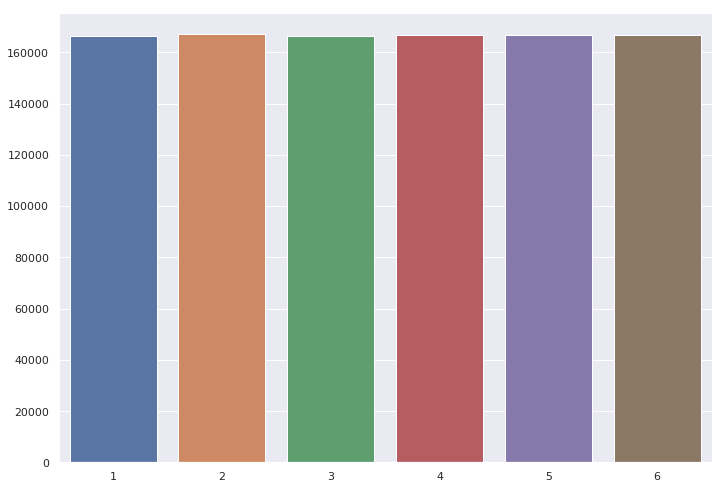

In [7]:
unique_values = sorted(values.unique().int().tolist())
counts = torch.histc(values, bins=len(unique_values))
sns.barplot(
    x=unique_values,
    y=counts.int()
)

In [8]:
print("Value\t Probability")
for value, prob in zip(unique_values, counts/(torch.sum(counts))):
    print(" {}\t {:.4f}".format(value, prob))

Value	 Probability
 1	 0.1663
 2	 0.1671
 3	 0.1664
 4	 0.1666
 5	 0.1668
 6	 0.1668


When the number of simulations is big enough, we see all the faces have the same probability of appearing.

## A 2-dice problem

We are going to roll 2 dices and sum the result of the faces. Which number should we bet?

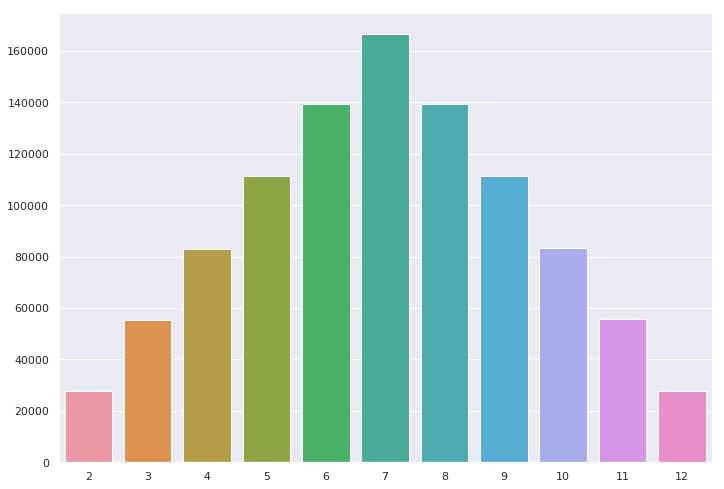

In [9]:
# Simulation parameters
n_dices = 2
n_rolls = 1000000  # Number of simulations to perform

# Distribution
roll_dist = Multinomial(n_dices, dice_probs)
samples = roll_dist.sample(torch.tensor([n_rolls]))  # Face count 
values = samples.mm(dice_faces_values).squeeze(1)  # Sum of the dice aces

unique_values = sorted(values.unique().int().tolist())
counts = torch.histc(values, bins=len(unique_values))
sns.barplot(
    x=unique_values,
    y=counts.int()
)

In [10]:
print("Value\t Probability")
for value, prob in zip(unique_values, counts/(torch.sum(counts))):
    print(" {}\t {:.4f}".format(value, prob))

Value	 Probability
 2	 0.0277
 3	 0.0552
 4	 0.0831
 5	 0.1113
 6	 0.1393
 7	 0.1665
 8	 0.1392
 9	 0.1112
 10	 0.0832
 11	 0.0556
 12	 0.0276


Our best choice would be to bet to the 7.

## Generalization

We roll:
* 3 6-faced dices
* 2 12-faced dices
* A 20-faced dice
* A coin (head sums 1, tails sums 0), but 60% of times we get tails

Which number should we bet?

In [11]:
dices = {}

for faces, n in [(6,3), (12,2), (20,1), (2,1)]:
    dices[faces] = {
        'probs': torch.ones(faces),
        'face_values': torch.arange(1,1+faces, dtype=torch.float).reshape(faces,1),
        'n': n,
    }
# Disbalanced Coin
dices[2]['probs'] = torch.tensor([60.,40.])  # The coin is disbalanced
dices[2]['face_values'] = torch.tensor([[0.], [1.]])

In [12]:
# Simulation parameters

n_rolls = 10000000  # Number of simulations to perform

dice_rolls = []

# Probability Distributions
for k,v in dices.items():
    dist = Multinomial(v['n'], v['probs'])
    samples = dist.sample(torch.tensor([n_rolls]))  # Face count 
    dice_rolls.append(samples.mm(v['face_values']).squeeze(1))  # Sum of the dice faces
    
values = torch.stack(dice_rolls).sum(dim=0)

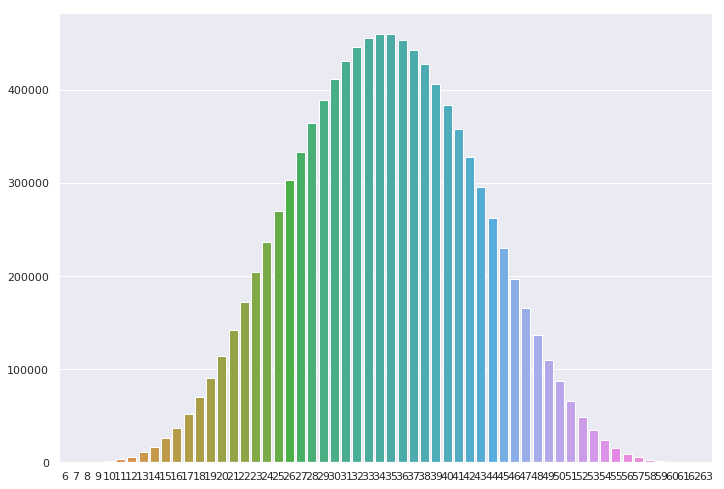

In [13]:
unique_values = sorted(values.unique().int().tolist())
counts = torch.histc(values, bins=len(unique_values))
sns.barplot(
    x=unique_values,
    y=counts.int()
)

In [14]:
print("Value\t Probability (%)")
for value, prob in sorted(zip(unique_values, counts/(torch.sum(counts)))):
    print(" {}\t {:.8f}".format(value, prob))

Value	 Probability (%)
 6	 0.00000070
 7	 0.00000610
 8	 0.00002660
 9	 0.00006580
 10	 0.00015360
 11	 0.00031380
 12	 0.00060560
 13	 0.00105390
 14	 0.00168980
 15	 0.00257770
 16	 0.00369520
 17	 0.00515880
 18	 0.00698410
 19	 0.00908870
 20	 0.01145390
 21	 0.01419740
 22	 0.01721220
 23	 0.02041030
 24	 0.02367670
 25	 0.02702060
 26	 0.03029110
 27	 0.03331120
 28	 0.03641520
 29	 0.03894180
 30	 0.04119870
 31	 0.04309910
 32	 0.04462860
 33	 0.04553340
 34	 0.04597870
 35	 0.04599080
 36	 0.04532280
 37	 0.04433760
 38	 0.04277730
 39	 0.04068380
 40	 0.03836670
 41	 0.03580270
 42	 0.03279360
 43	 0.02956740
 44	 0.02626680
 45	 0.02297200
 46	 0.01970610
 47	 0.01662030
 48	 0.01364990
 49	 0.01094760
 50	 0.00869230
 51	 0.00653380
 52	 0.00485550
 53	 0.00344840
 54	 0.00236420
 55	 0.00154210
 56	 0.00094220
 57	 0.00052370
 58	 0.00028350
 59	 0.00013760
 60	 0.00005630
 61	 0.00001930
 62	 0.00000600
 63	 0.00000040


The less possible value is 6 and the maximum is 63 ($3*6 + 2*12 + 20 + 1$).


In [15]:
print("Ranking")
print("Value\t Probability (%)")
for value, prob in sorted(
        zip(unique_values, counts/(torch.sum(counts))),
        key=lambda x: x[1],
        reverse=True
    ):
    print(" {}\t {:.8f}".format(value, prob))

Ranking
Value	 Probability (%)
 35	 0.04599080
 34	 0.04597870
 33	 0.04553340
 36	 0.04532280
 32	 0.04462860
 37	 0.04433760
 31	 0.04309910
 38	 0.04277730
 30	 0.04119870
 39	 0.04068380
 29	 0.03894180
 40	 0.03836670
 28	 0.03641520
 41	 0.03580270
 27	 0.03331120
 42	 0.03279360
 26	 0.03029110
 43	 0.02956740
 25	 0.02702060
 44	 0.02626680
 24	 0.02367670
 45	 0.02297200
 23	 0.02041030
 46	 0.01970610
 22	 0.01721220
 47	 0.01662030
 21	 0.01419740
 48	 0.01364990
 20	 0.01145390
 49	 0.01094760
 19	 0.00908870
 50	 0.00869230
 18	 0.00698410
 51	 0.00653380
 17	 0.00515880
 52	 0.00485550
 16	 0.00369520
 53	 0.00344840
 15	 0.00257770
 54	 0.00236420
 14	 0.00168980
 55	 0.00154210
 13	 0.00105390
 56	 0.00094220
 12	 0.00060560
 57	 0.00052370
 11	 0.00031380
 58	 0.00028350
 10	 0.00015360
 59	 0.00013760
 9	 0.00006580
 60	 0.00005630
 8	 0.00002660
 61	 0.00001930
 7	 0.00000610
 62	 0.00000600
 6	 0.00000070
 63	 0.00000040
